# 분석에 필요한 파생컬럼 생성 및 테이블 조인

In [52]:
import pandas as pd
import numpy as np

art = pd.read_csv("data/art_processed.csv")                 # 상품 메타데이터
cust = pd.read_csv("data/cust_processed.csv")
total_revenue = pd.read_csv("data/total_revenue.csv")

# 고객등급분류. 내용자체는 total_revenue에 들어가있음
customer_revenue = pd.read_csv("data/customer_revenue.csv")

In [ ]:
# ----------------------------------------------------
# 상품 메타데이터
# 상품군 / 색상 / 톤 / 카테고리별 매출 분석의 기반
# 상위 20%, 하위 20% 고객이 어떤 상품군을 소비할까?, 접근한 상품 특성이 무었일까?
# 거래데이터와 조인 해보기
# ----------------------------------------------------
art.info()

<class 'pandas.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   article_id     105542 non-null  int64
 1   product_code   105542 non-null  int64
 2   product_type   105542 non-null  str  
 3   product_group  105542 non-null  str  
 4   garment_group  105542 non-null  str  
 5   index_group    105542 non-null  str  
 6   index_name     105542 non-null  str  
 7   section        105542 non-null  str  
 8   graphic        105542 non-null  str  
 9   color          105542 non-null  str  
 10  tone           105542 non-null  str  
 11  color_master   105542 non-null  str  
 12  prod_name      105542 non-null  str  
dtypes: int64(2), str(11)
memory usage: 10.5 MB


In [17]:
art.head()

,article_id,product_code,product_type,product_group,garment_group,index_group,index_name,section,graphic,color,tone,color_master,prod_name
0,108775015,108775,Vest top,Garment Upper body,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Solid,Black,Dark,Black,Strap top
1,108775044,108775,Vest top,Garment Upper body,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Solid,White,Light,White,Strap top
2,108775051,108775,Vest top,Garment Upper body,Jersey Basic,Ladieswear,Ladieswear,Womens Everyday Basics,Stripe,Off White,Dusty Light,White,Strap top (1)
3,110065001,110065,Bra,Underwear,"Under-, Nightwear",Ladieswear,Lingeries/Tights,Womens Lingerie,Solid,Black,Dark,Black,OP T-shirt (Idro)
4,110065002,110065,Bra,Underwear,"Under-, Nightwear",Ladieswear,Lingeries/Tights,Womens Lingerie,Solid,White,Light,White,OP T-shirt (Idro)


In [ ]:
# ----------------------------------------------------
# 고객 속성 정리 테이블
# 구독여부, 연령대
# 거래데이터와 조인 해보기
# ----------------------------------------------------
cust.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype
---  ------                  --------------    -----
 0   customer_id             1048575 non-null  str  
 1   FN                      1048575 non-null  bool 
 2   Active                  1048575 non-null  bool 
 3   club_member_status      1048575 non-null  str  
 4   fashion_news_frequency  1048575 non-null  str  
 5   age                     1048575 non-null  int64
 6   age_group               1048575 non-null  str  
dtypes: bool(2), int64(1), str(4)
memory usage: 42.0 MB


In [4]:
cust.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,age_group
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,False,False,ACTIVE,NONE,49,40s
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,False,False,ACTIVE,NONE,25,20s
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,False,False,ACTIVE,NONE,24,20s
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,False,False,ACTIVE,NONE,54,50s
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,True,True,ACTIVE,Regularly,52,50s


In [ ]:
# ----------------------------------------------------
# 거래테이블
# 
# 필요에 따라 상품, 고객 테이블과 조인
# ----------------------------------------------------
total_revenue.info()

<class 'pandas.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   customer_id    1048575 non-null  str    
 1   article_id     1048575 non-null  int64  
 2   revenue        1048575 non-null  float64
 3   year           1048575 non-null  int64  
 4   month          1048575 non-null  int64  
 5   year_month     1048575 non-null  str    
 6   channel        1048575 non-null  str    
 7   total_revenue  1048575 non-null  float64
 8   revenue_group  1048575 non-null  str    
dtypes: float64(2), int64(3), str(4)
memory usage: 72.0 MB


In [ ]:
# ----------------------------------------------------
# 고객등급 정의용
# 상위 20%, 하위 20% 그외로 구성
# ----------------------------------------------------
customer_revenue.info()

<class 'pandas.DataFrame'>
RangeIndex: 458235 entries, 0 to 458234
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   customer_id    458235 non-null  str    
 1   total_revenue  458235 non-null  float64
 2   revenue_group  458235 non-null  str    
dtypes: float64(1), str(2)
memory usage: 10.5 MB


In [48]:
customer_revenue["revenue_group"].value_counts(normalize=True)

revenue_group
middle       0.599533
top_20       0.200465
bottom_20    0.200002
Name: proportion, dtype: float64

# 파생컬럼 생성 및 테이블 생성

In [53]:
total_revenue = total_revenue.drop(columns=["t_dat"], errors="ignore")

In [ ]:
# # ---------------------------------------------------------------------
# 분석용 통합 테이블 거래+고객+상품
# 볼수 있는 데이터
# ==  거래(매출, 채널, 날짜, 고객그룹) + 고객속성 + 상품속성
# 가입한 사람이 아닌 소비한 고객을 골라야 하기 때문에 inner 사용
# ---------------------------------------------------------------------

analysis = (
    total_revenue
    .merge(cust, on="customer_id", how="inner")      # 고객 속성
    .merge(art, on="article_id", how="inner")        # 상품 속성
)
analysis.shape

(812931, 27)

In [58]:
analysis.head()

,customer_id,article_id,revenue,year,month,year_month,channel,total_revenue,revenue_group,FN,...,product_group,garment_group,index_group,index_name,section,graphic,color,tone,color_master,prod_name
0,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2019,11,2019-11,online,0.227186,top_20,True,...,Garment Upper body,Jersey Fancy,Divided,Divided,Divided Collection,Placement print,Dark Blue,Dark,Blue,ZEBRA CF TVP
1,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2019,5,2019-05,online,0.067746,middle,False,...,Garment Upper body,Jersey Fancy,Ladieswear,Ladieswear,Womens Casual,Stripe,White,Light,White,BUBBLE WRAP TOP
2,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2019,5,2019-05,online,0.016932,bottom_20,True,...,Garment Lower body,Shorts,Menswear,Menswear,Contemporary Casual,Chambray,Dark Blue,Dark,Blue,Teddy jogger.
3,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2019,8,2019-08,online,0.033881,middle,False,...,Accessories,Accessories,Ladieswear,Ladies Accessories,Womens Big accessories,Solid,Black,Dark,Black,Yuki shopper
4,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,2019,8,2019-08,store,0.028627,middle,False,...,Socks & Tights,Socks and Tights,Menswear,Menswear,Men Underwear,All over pattern,White,Light,White,1pk Sportsock


## 파생컬럼 생성

In [60]:
# 구독여부
analysis["is_member"] = analysis["club_member_status"].eq("ACTIVE")
# 관심여부
analysis["receives_news"] = analysis["fashion_news_frequency"].ne("NONE")

In [61]:
analysis[["FN", "fashion_news_frequency"]].head()

,FN,fashion_news_frequency
0,True,Regularly
1,False,NONE
2,True,Regularly
3,False,NONE
4,False,NONE


# 분석에 필요없는 컬럼 제거
- club_member_status, fashion_news_frequency: 파생컬럼으로 대체
- year, month: year_month로 충분

In [62]:
analysis_final = analysis.drop(
    columns=[
        "club_member_status",   # 파생컬럼으로 대체
        "fashion_news_frequency",# 파생컬럼으로 대체
        "FN",               # 패션 뉴스 수신/ 미수신 여부는 fashion_news_frequency 파생컬럼으로 확인가능
        "Active",           # 활성 기준이 불정확해 삭제
        "product_code",     # 내부관리코드
        "product_type",     # product_group과 중복됨
        "prod_name",        # 상품설명이기에 제거
        "year",     # year_month 컬럼으로 대체 가능
        "month"     # year_month 컬럼으로 대체 가능
    ],
    errors="ignore"
)

In [63]:
analysis_final.head()

,customer_id,article_id,revenue,year_month,channel,total_revenue,revenue_group,age,age_group,product_group,garment_group,index_group,index_name,section,graphic,color,tone,color_master,is_member,receives_news
0,3e2b60b679e62fb49516105b975560082922011dd752ec...,698328010,0.016932,2019-11,online,0.227186,top_20,51,50s,Garment Upper body,Jersey Fancy,Divided,Divided,Divided Collection,Placement print,Dark Blue,Dark,Blue,True,True
1,89647ac2274f54c770aaa4b326e0eea09610c252381f37...,760597002,0.033881,2019-05,online,0.067746,middle,28,20s,Garment Upper body,Jersey Fancy,Ladieswear,Ladieswear,Womens Casual,Stripe,White,Light,White,True,False
2,2ebe392150feb60ca89caa8eff6c08b7ef1138cd6fdc71...,488561032,0.016932,2019-05,online,0.016932,bottom_20,37,30s,Garment Lower body,Shorts,Menswear,Menswear,Contemporary Casual,Chambray,Dark Blue,Dark,Blue,True,True
3,7b3205de4ca17a339624eb5e3086698e9984eba6b47c56...,682771001,0.033881,2019-08,online,0.033881,middle,19,10s,Accessories,Accessories,Ladieswear,Ladies Accessories,Womens Big accessories,Solid,Black,Dark,Black,True,False
4,3b77905de8b32045f08cedb79200cdfa477e9562429a39...,742400033,0.003220,2019-08,store,0.028627,middle,35,30s,Socks & Tights,Socks and Tights,Menswear,Menswear,Men Underwear,All over pattern,White,Light,White,True,False


In [69]:
customer_revenue["revenue_group"].value_counts(normalize=True)

revenue_group
middle       0.599533
top_20       0.200465
bottom_20    0.200002
Name: proportion, dtype: float64

In [68]:
analysis_final["revenue_group"].value_counts(normalize=True)

revenue_group
top_20       0.455898
middle       0.453932
bottom_20    0.090170
Name: proportion, dtype: float64

분포가 달라진 이유
- customer_revenue: 고객 단위 테이블
    - 고객 1명 = 행 1개
- analysis_final: 거래 단위 테이블
    - 고객 1명이 여러 행(여러 구매)을 가짐, INNER JOIN 사용

행이 줄어든 원인
- 거래 단위로 바뀜
    - 상위 20% 고객은
        - 구매 횟수가 많음, 거래 행이 많이 생성됨
    - 하위 20% 고객은
        - 구매 횟수가 적음, 거래 행이 거의 없음
- INNER JOIN 사용으로 일부 거래가 사라짐
    - 상품 정보가 없는 거래, 고객 정보가 누락된 거래는 제거됨

때문에 의도된 행의 감소라 볼수 있음
- 상·하위 20% 고객이 어떤 행동(구매/채널/상품)을 보이는가 를 분석하기엔 큰 문제가 발생하지 않음

> 고객 단위로 매출 등급을 산정하였으나, 이후 분석은 거래 단위 데이터를 기준으로 수행하였다. 이로 인해 구매 빈도가 높은 상위 고객의 거래 비중이 상대적으로 크게 나타난다.


# 관계요인 분석 테이블

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

## 구독 여부와의 관계도
- 상위 20% 전체 거래 중 구독 거래가 몇 건인지

In [ ]:
# 나중에 비율로 보는법 알아보기
member_status = (
    analysis_final
    .groupby(["revenue_group", "is_member"])
    .size()
    .reset_index(name="count")
)

member_status
# --------------------------------------------------
# top_20에서 is_member=True 비율 ?
# bottom_20에서 False 비율 ?
# --------------------------------------------------

,revenue_group,is_member,count
0,bottom_20,False,2776
1,bottom_20,True,70526
2,middle,False,10573
3,middle,True,358442
4,top_20,False,3519
5,top_20,True,367095


<Figure size 640x480 with 0 Axes>

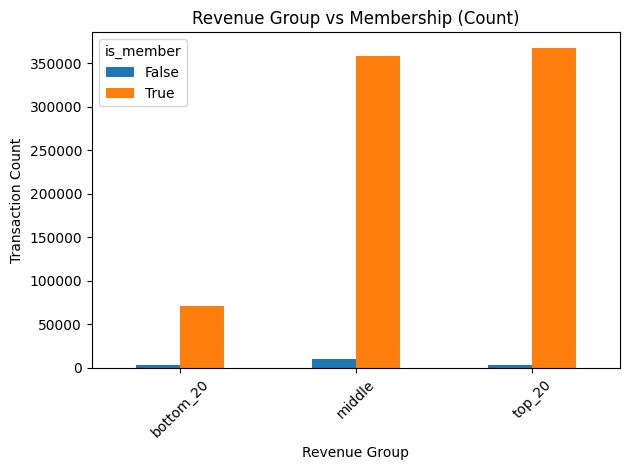

In [ ]:
pivot_member = member_status.pivot(
    index="revenue_group",
    columns="is_member",
    values="count"
)

plt.figure()
pivot_member.plot(kind="bar")
plt.title("Revenue Group vs Membership (Count)")
plt.xlabel("Revenue Group")
plt.xticks(rotation=45)
plt.ylabel("Transaction Count")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

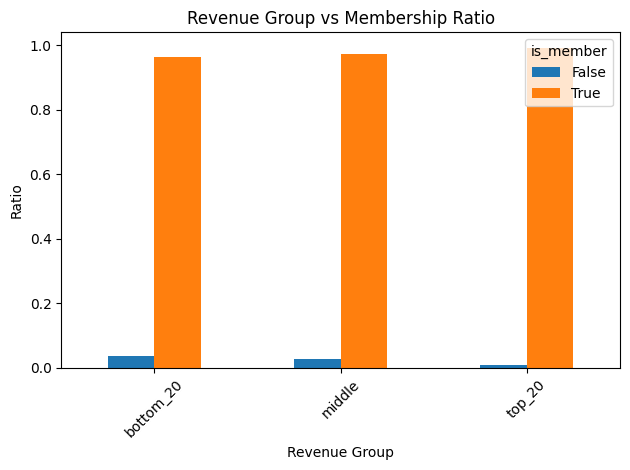

In [89]:
member_dist = (
    analysis_final
    .groupby(["revenue_group", "is_member"], as_index=False)
    .size()
)

member_ratio = (
    member_dist
    .assign(
        ratio=lambda x: x["size"] /
        x.groupby("revenue_group")["size"].transform("sum")
    )
)

pivot_member = member_ratio.pivot(
    index="revenue_group",
    columns="is_member",
    values="ratio"
)

plt.figure()
pivot_member.plot(kind="bar")
plt.title("Revenue Group vs Membership Ratio")
plt.xlabel("Revenue Group")
plt.xticks(rotation=45)
plt.ylabel("Ratio")
plt.tight_layout()
plt.show()

In [105]:
cust_member_ratio = (
    analysis_final
    .drop_duplicates("customer_id")
    .groupby(["revenue_group", "is_member"])
    .size()
    .groupby(level=0)
    .apply(lambda x: x / x.sum())
)

cust_member_ratio


revenue_group  revenue_group  is_member
bottom_20      bottom_20      False        0.038864
                              True         0.961136
middle         middle         False        0.036851
                              True         0.963149
top_20         top_20         False        0.014339
                              True         0.985661
dtype: float64

구독 여부는 상·하위 20%를 ‘구분’하는 결정적 요인이 아니다
- 하위 20%도 이미 대부분이 구독 고객이다.
- 상·중·하 집단 모두에서 구독률이 96% 이상

- 구독은 '차별 요인'이 아닌'기본 조건'에 가깝다.
    - 즉, 구독은 이탈을 막고, 관계를 유지하는 최소 조건이라 볼수 있음

> 본 데이터에서는 대부분의 고객이 이미 멤버십에 가입되어 있어, 구독 여부 자체는 매출 그룹 간의 차이를 설명하는 주요 요인으로서 작용하지 않았다. 이는 멤버십이 소비 증대를 유도하는 차별적 요소 보단, 기본적인 고객 유지 장치로 작동하고 있음을 말해주고 있다.

In [85]:
# 뉴스 수신 여부와의 관계
news_status = (
    analysis_final
    .groupby(["revenue_group", "receives_news"])
    .size()
    .reset_index(name="count")
)

news_status 
# --------------------------------------------------
# 상위 20% 고객의 뉴스 수신 비율이 높은가?
# 하위 20%는 정보 노출 자체가 부족한가?
# --------------------------------------------------

,revenue_group,receives_news,count
0,bottom_20,False,43840
1,bottom_20,True,29462
2,middle,False,215579
3,middle,True,153436
4,top_20,False,200271
5,top_20,True,170343


<Figure size 640x480 with 0 Axes>

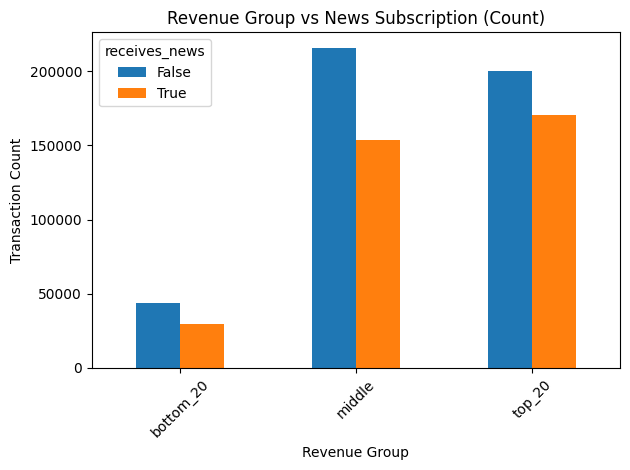

In [86]:
pivot_news = news_status.pivot(
    index="revenue_group",
    columns="receives_news",
    values="count"
)

plt.figure()
pivot_news.plot(kind="bar")
plt.title("Revenue Group vs News Subscription (Count)")
plt.xlabel("Revenue Group")
plt.xticks(rotation=45)
plt.ylabel("Transaction Count")
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

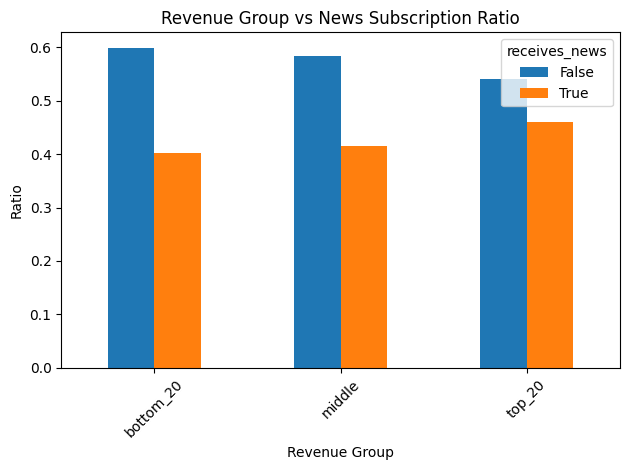

In [90]:
news_dist = (
    analysis_final
    .groupby(["revenue_group", "receives_news"], as_index=False)
    .size()
)

news_ratio = (
    news_dist
    .assign(
        ratio=lambda x: x["size"] /
        x.groupby("revenue_group")["size"].transform("sum")
    )
)

pivot_news = news_ratio.pivot(
    index="revenue_group",
    columns="receives_news",
    values="ratio"
)

plt.figure()
pivot_news.plot(kind="bar")
plt.title("Revenue Group vs News Subscription Ratio")
plt.xlabel("Revenue Group")
plt.xticks(rotation=45)
plt.ylabel("Ratio")
plt.tight_layout()
plt.show()

In [92]:
# 채널 이용 성향과의 관계
channel_pattern = (
    analysis_final
    .groupby(["revenue_group", "channel"])
    .size()
    .reset_index(name="count")
)

channel_pattern
# --------------------------------------------------
# 상위 20%는 특정 채널에 매출이 집중되는가?
# 하위 20%는 채널 분산/저활성 상태인가?
# --------------------------------------------------

,revenue_group,channel,count
0,bottom_20,online,36526
1,bottom_20,store,36776
2,middle,online,230907
3,middle,store,138108
4,top_20,online,298086
5,top_20,store,72528


<Figure size 640x480 with 0 Axes>

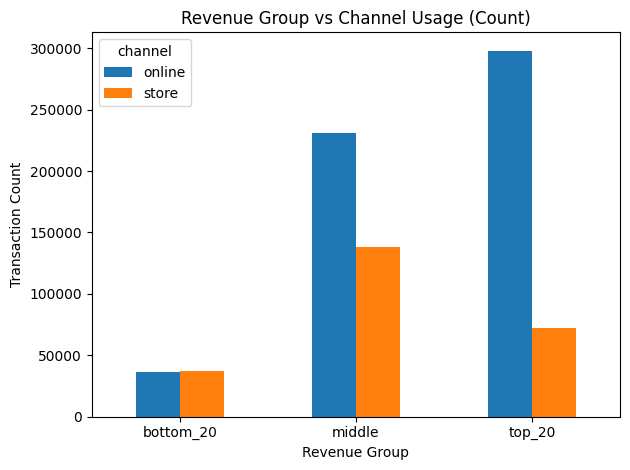

In [93]:
channel_pivot = channel_pattern.pivot(
    index="revenue_group",
    columns="channel",
    values="count"
)
plt.figure()
channel_pivot.plot(kind="bar")
plt.title("Revenue Group vs Channel Usage (Count)")
plt.xlabel("Revenue Group")
plt.ylabel("Transaction Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [95]:
# 상품 소비 성향과의 관계
product_pattern = (
    analysis_final
    .groupby(["revenue_group", "product_group"])
    .size()
    .reset_index(name="count")
)

product_pattern
# --------------------------------------------------
# 상위 20%는 특정 상품군 비중이 높나?
# 하위 20%는 기본 상품만 구매하나?
# --------------------------------------------------

,revenue_group,product_group,count
0,bottom_20,Accessories,7819
1,bottom_20,Cosmetic,10
2,bottom_20,Furniture,1
3,bottom_20,Garment Full body,3053
4,bottom_20,Garment Lower body,8861
5,bottom_20,Garment Upper body,33534
6,bottom_20,Items,24
7,bottom_20,Nightwear,639
8,bottom_20,Shoes,873
9,bottom_20,Socks & Tights,4463


<Figure size 2000x2000 with 0 Axes>

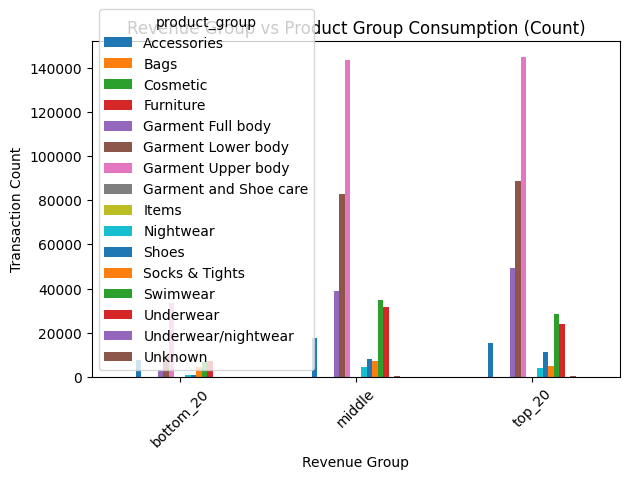

In [ ]:
product_pivot = product_pattern.pivot(
    index="revenue_group",
    columns="product_group",
    values="count"
)

plt.figure(figsize=(12, 6))
product_pivot.plot(kind="bar")
plt.title("Revenue Group vs Product Group Consumption (Count)")
plt.xlabel("Revenue Group")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

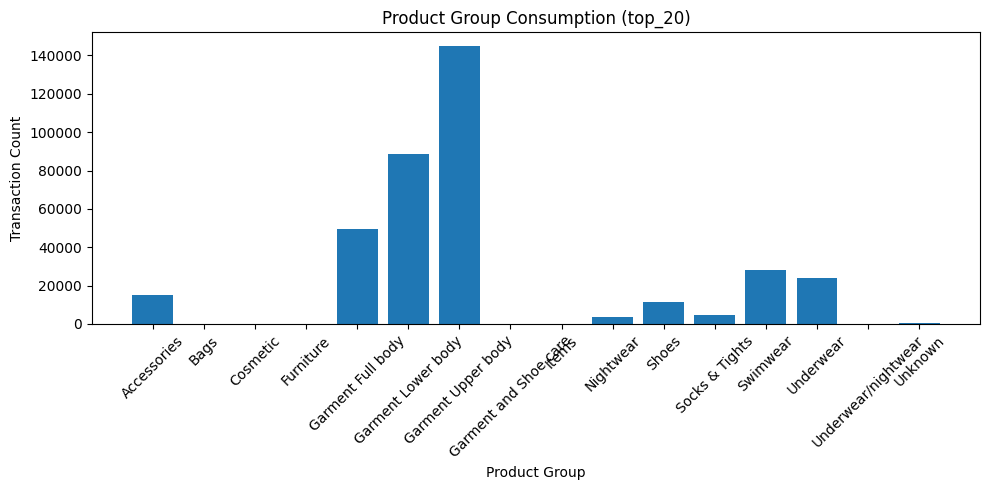

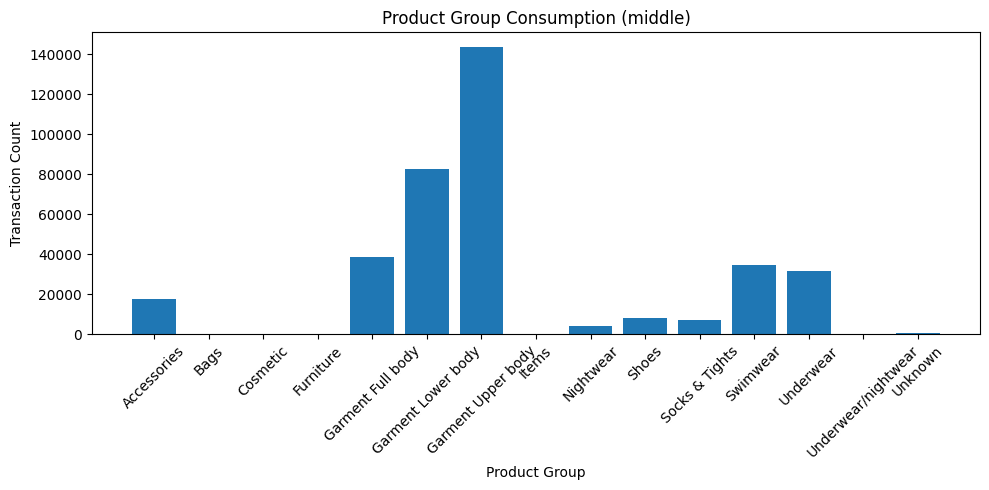

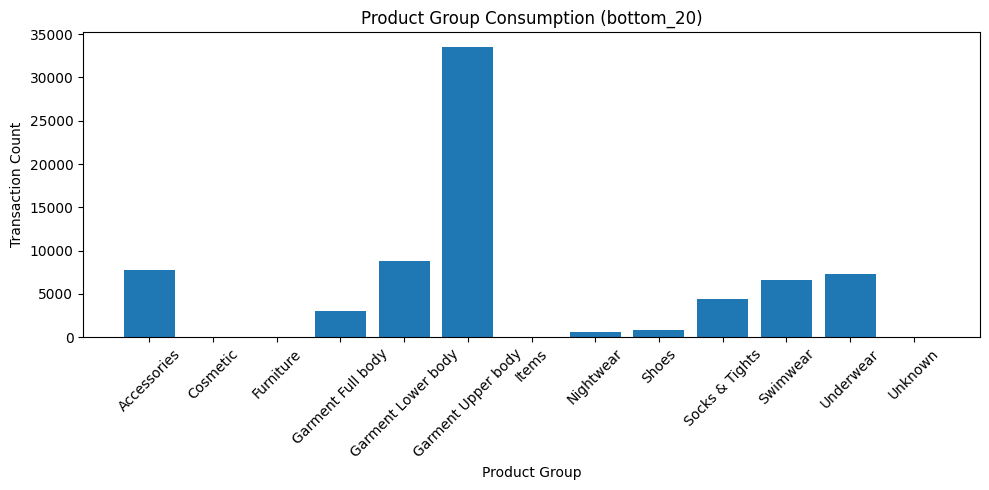

In [101]:
for group in ["top_20", "middle", "bottom_20"]:
    tmp = product_pattern[product_pattern["revenue_group"] == group]

    plt.figure(figsize=(10, 5))
    plt.bar(tmp["product_group"], tmp["count"])
    plt.title(f"Product Group Consumption ({group})")
    plt.xlabel("Product Group")
    plt.ylabel("Transaction Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [102]:
analysis_final.shape

(812931, 20)

In [103]:
analysis_final["revenue"].describe()

count    812931.000000
mean          0.027774
std           0.019320
min           0.000237
25%           0.015237
50%           0.025407
75%           0.033881
max           0.506780
Name: revenue, dtype: float64

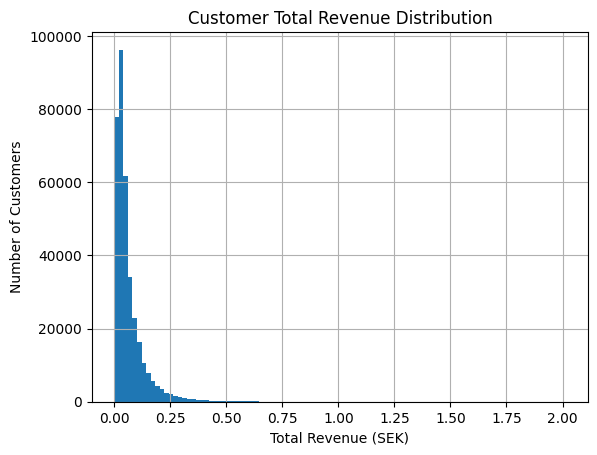

In [104]:
plt.figure()
analysis_final[["customer_id", "total_revenue"]].drop_duplicates()["total_revenue"].hist(bins=100)
plt.title("Customer Total Revenue Distribution")
plt.xlabel("Total Revenue (SEK)")
plt.ylabel("Number of Customers")
plt.show()